In [67]:
# This notebook calculates normalized cumulative distributions for various statistics of convective environment parameters both with and without condensate thresholds

# Import python libraries
import pickle
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import OrderedDict
import matplotlib.gridspec as gridspec
import copy

In [68]:
# Define colors for individual cases / simulations
scolors = OrderedDict()
scolors['ARG1.1-R_old'] = 'darkorange'
scolors['ARG1.2-R'] = 'orange'
scolors['PHI2.1-R'] = 'darkviolet'
scolors['BRA1.2-R'] = 'gold'
scolors['AUS1.1-R'] = 'mediumorchid'
scolors['PHI1.1-R'] = 'mediumpurple'
scolors['PHI1.1-RPR'] = 'mediumpurple'
scolors['USA1.1-R'] = 'lightblue'
scolors['BRA1.1-R'] = 'yellowgreen'
scolors['BRA1.1-RPR'] = 'yellowgreen'
scolors['WPO1.1-R'] = 'dodgerblue'
scolors['DRC1.1-R'] = 'green'
scolors['DRC1.1-RCR'] = 'green'
scolors['RSA1.1-R'] = 'olivedrab'

In [69]:
# Define Variable Names
var = OrderedDict()
var[0] = OrderedDict()
var[0]['titlename'] = 'ML CIN'
var[0]['units'] = 'J/kg'
var[0]['varname'] = 'mlcin'
var[0]['varins'] = 'mlcins'
var[0]['varin'] = 'mlcin'
#var[0]['bins'] = np.arange(-300,0.1,2)
var[0]['bins'] = np.arange(0,500,2)
var[0]['sbins'] = np.arange(0,1.01,0.001)

var[1] = OrderedDict()
var[1]['titlename'] = 'ML CAPE'
var[1]['units'] = 'J/kg'
var[1]['varname'] = 'MLCAPE'
var[1]['varins'] = 'mlcapes'
var[1]['varin'] = 'mlcape'
var[1]['bins'] = np.arange(0,5001,20)
var[1]['sbins'] = np.arange(0,1.01,0.001)

var[2] = OrderedDict()
var[2]['titlename'] = 'Lowlevel Wind Shear'
var[2]['units'] = 'm/s'
var[2]['varname'] = 'Shear$_{low-level}$'
var[2]['varins'] = 'shr_lls'
var[2]['varin'] = 'shr_ll'
var[2]['bins'] =  np.arange(0,60,0.2)
var[2]['sbins'] = np.arange(0,1.01,0.001)

var[3] = OrderedDict()
var[3]['titlename'] = 'Midlevel Wind Shear'
var[3]['units'] = 'm/s'
var[3]['varname'] = 'Shear$_{mid-level}$'
var[3]['varins'] = 'shr_mls'
var[3]['varin'] = 'shr_ml'
var[3]['bins'] =  np.arange(0,60,0.2)
var[3]['sbins'] = np.arange(0,1.01,0.001)

var[4] = OrderedDict()
var[4]['titlename'] = 'Midlevel Relative Humidity'
var[4]['units'] = 'unitless'
var[4]['varname'] = 'RH$_{mid-level}$'
var[4]['varins'] = 'rh_mls'
var[4]['bins'] = np.arange(0.0,1.01,0.01)
var[4]['sbins'] = np.arange(0,1.01,0.001)

var[5] = OrderedDict()
var[5]['titlename'] = 'Lowlevel Relative Humidity'
var[5]['units'] = 'unitless'
var[5]['varname'] = 'RH$_{low-level}$'
var[5]['varins'] = 'rh_lls'
var[5]['bins'] = np.arange(0.0,1.01,0.01)
var[5]['sbins'] = np.arange(0,1.01,0.001)

var[6] = OrderedDict()
var[6]['titlename'] = 'Total Column Water Vapor'
var[6]['units'] = 'kg/m^2'
var[6]['varname'] = 'tcwv'
var[6]['varins'] = 'tcwvs'
var[6]['bins'] = np.arange(0,80.1,1)
var[6]['sbins'] = np.arange(0,1.01,0.001)

var[7] = OrderedDict()
var[7]['titlename'] = 'Total Column Condensate'
var[7]['units'] = 'kg/m^2'
var[7]['varname'] = 'tcwc'
var[7]['varins'] = 'tcwcs'
var[7]['bins'] = np.arange(0,100.1,1)
var[7]['sbins'] = np.arange(0,1.01,0.001)

var[8] = OrderedDict()
var[8]['titlename'] = 'Surface RH'
var[8]['units'] = 'unitless'
var[8]['varname'] = 'RH$_{surface}$'
var[8]['varins'] = 'rh_sfcs'
var[8]['bins'] = np.arange(0.0,1.11,0.01)
var[8]['sbins'] = np.arange(0,1.01,0.001)

var[9] = OrderedDict()
var[9]['titlename'] = '850hPa RH'
var[9]['units'] = 'unitless'
var[9]['varname'] = 'RH$_{850hPa}$'
var[9]['varins'] = 'rh_850s'
var[9]['bins'] = np.arange(0.0,1.11,0.01)
var[9]['sbins'] = np.arange(0,1.01,0.001)

var[10] = OrderedDict()
var[10]['titlename'] = '500hPa RH'
var[10]['units'] = 'unitless'
var[10]['varname'] = 'RH$_{500hPa}$'
var[10]['varins'] = 'rh_500s'
var[10]['bins'] = np.arange(0.0,1.11,0.01)
var[10]['sbins'] = np.arange(0,1.01,0.001)

var[11] = OrderedDict()
var[11]['titlename'] = '250hPa RH'
var[11]['units'] = 'unitless'
var[11]['varname'] = 'RH$_{250hPa}$'
var[11]['varins'] = 'rh_250s'
var[11]['bins'] = np.arange(0.0,1.11,0.01)
var[11]['sbins'] = np.arange(0,1.01,0.001)

var[12] = OrderedDict()
var[12]['titlename'] = 'Surface Temperature'
var[12]['units'] = 'K'
var[12]['varname'] = 'TEMP$_{surface}$'
var[12]['varins'] = 't_sfcs'
var[12]['bins'] = np.arange(0,350.1,0.1)
var[12]['sbins'] = np.arange(0,1.01,0.001)

var[13] = OrderedDict()
var[13]['titlename'] = '850 Temperature'
var[13]['units'] = 'K'
var[13]['varname'] = 'TEMP$_{850hPa}$'
var[13]['varins'] = 't_850s'
var[13]['bins'] = np.arange(0,600.1,0.1)
var[13]['sbins'] = np.arange(0,1.01,0.001)

var[14] = OrderedDict()
var[14]['titlename'] = '500 Temperature'
var[14]['units'] = 'K'
var[14]['varname'] = 'TEMP$_{500hPa}$'
var[14]['varins'] = 't_500s'
var[14]['bins'] = np.arange(0,600.1,0.1)
var[14]['sbins'] = np.arange(0,1.01,0.001)

var[15] = OrderedDict()
var[15]['titlename'] = '250 Temperature'
var[15]['units'] = 'K'
var[15]['varname'] = 'TEMP$_{250hPa}$'
var[15]['varins'] = 't_250s'
var[15]['bins'] = np.arange(0,600.1,0.1)
var[15]['sbins'] = np.arange(0,1.01,0.001)

var[16] = OrderedDict()
var[16]['titlename'] = 'Surface Winds'
var[16]['units'] = 'unitless'
var[16]['varname'] = 'SPD$_{surface}$'
var[16]['varins'] = 'spd_sfcs'
var[16]['bins'] = np.arange(0.0,50.1,0.5)
var[16]['sbins'] = np.arange(0,1.01,0.001)

var[17] = OrderedDict()
var[17]['titlename'] = '850hPa Winds'
var[17]['units'] = 'unitless'
var[17]['varname'] = 'SPD$_{850hPa}$'
var[17]['varins'] = 'spd_850s'
var[17]['bins'] = np.arange(0.0,50.1,0.5)
var[17]['sbins'] = np.arange(0,1.01,0.001)

var[18] = OrderedDict()
var[18]['titlename'] = '500hPa Winds'
var[18]['units'] = 'unitless'
var[18]['varname'] = 'SPD$_{500hPa}$'
var[18]['varins'] = 'spd_500s'
var[18]['bins'] = np.arange(0.0,50.1,0.5)
var[18]['sbins'] = np.arange(0,1.01,0.001)

var[19] = OrderedDict()
var[19]['titlename'] = '250hPa Winds'
var[19]['units'] = 'unitless'
var[19]['varname'] = 'SPD$_{250hPa}$'
var[19]['varins'] = 'spd_250s'
var[19]['bins'] = np.arange(0.0,50.1,0.5)
var[19]['sbins'] = np.arange(0,1.01,0.001)

var[20] = OrderedDict()
var[20]['titlename'] = 'Surface RV'
var[20]['units'] = 'unitless'
var[20]['varname'] = 'rvsfc'
var[20]['varins'] = 'rv_sfcs'
var[20]['bins'] = np.arange(0.0,0.02,0.001)
var[20]['sbins'] = np.arange(0,1.01,0.001)

var[21] = OrderedDict()
var[21]['titlename'] = '850hPa RV'
var[21]['units'] = 'unitless'
var[21]['varname'] = 'rv850'
var[21]['varins'] = 'rv_850s'
var[21]['bins'] = np.arange(0.0,0.02,0.001)
var[21]['sbins'] = np.arange(0,1.01,0.001)

var[22] = OrderedDict()
var[22]['titlename'] = '500hPa RV'
var[22]['units'] = 'unitless'
var[22]['varname'] = 'rv500'
var[22]['varins'] = 'rv_500s'
var[22]['bins'] = np.arange(0.0,0.02,0.001)
var[22]['sbins'] = np.arange(0,1.01,0.001)

var[23] = OrderedDict()
var[23]['titlename'] = '250hPa RV'
var[23]['units'] = 'unitless'
var[23]['varname'] = 'rv250'
var[23]['varins'] = 'rv_250s'
var[23]['bins'] = np.arange(0.0,0.02,0.001)
var[23]['sbins'] = np.arange(0,1.01,0.001)

var[24] = OrderedDict()
var[24]['titlename'] = 'MidLevel Lapse Rates'
var[24]['units'] = 'K/m'
var[24]['varname'] = 't_mllr'
var[24]['varins'] = 't_mllrs'
var[24]['bins'] = np.arange(0.5,10.,0.1)/10000
var[24]['sbins'] = np.arange(0,1.01,0.001)

# Added George Bryan Cape Code with two different mixed layer depths (500m, 1km)
var[25] = OrderedDict()
var[25]['titlename'] = 'ML CAPE (GB)'
var[25]['units'] = 'J/kg'
var[25]['varname'] = 'MLCAPE (500m)'
var[25]['varins'] = 'mlcapesGB'
var[25]['varin'] = 'mlcapeGB'
var[25]['bins'] = np.arange(0,5001,20)
var[25]['sbins'] = np.arange(0,1.01,0.001)

var[26] = OrderedDict()
var[26]['titlename'] = 'ML CAPE (GB1)'
var[26]['units'] = 'J/kg'
var[26]['varname'] = 'MLCAPE (1km)'
var[26]['varins'] = 'mlcapesGB1'
var[26]['varin'] = 'mlcapeGB1'
var[26]['bins'] = np.arange(0,5001,20)
var[26]['sbins'] = np.arange(0,1.01,0.001)

var[27] = OrderedDict()
var[27]['titlename'] = 'MU CAPE (GB)'
var[27]['units'] = 'J/kg'
var[27]['varname'] = 'MUCAPE'
var[27]['varins'] = 'mucapesGB'
var[27]['varin'] = 'mucapeGB1'
var[27]['bins'] = np.arange(0,5001,20)
var[27]['sbins'] = np.arange(0,1.01,0.001)

In [70]:
#cscrs = [0.1,0.01,0.001,0.0001,9999,0.00001]


In [71]:
savepath = '/tempest/pmarin/monsoon/ENV/Plots/Summary/'
savepath = '/tempest/pmarin/monsoon/ENV/Plots/FINAL/'
plt.rcParams.update({'font.size': 13})

scr_thr = 0.25 # % of reanalysis grid that must be condensate free to include in analysis
savepickpath = '/tempest/pmarin/monsoon/ENV/'
cscrs = ['c0.1','c0.01','c0.001','c0.0001','c1e-05','c1e-06','c9999'] # Condonsate screening on SUBGRID
cc_now = [0,1,2,3,4,5,6]
ccs = ['-c','-b','-y','-o','-r','-m','-k']
cases4 = [['ARG1.1-R_old','ARG1.2-R','BRA1.1-R','BRA1.2-R','AUS1.1-R','DRC1.1-R','PHI1.1-R','PHI2.1-R','WPO1.1-R','USA1.1-R','RSA1.1-R']]

# Define analysis data savename
saveadd = '_all_100'
saveadds = ['_all_100','_all_100_120'] # Exlcuding 10km for edges, 0.25 grid spacing, two times
saveaddf = '_27KM'

#saveadds = ['_all_100_p15'] #16KM_AREA for initial time
#saveaddf = '_16KM'

gs = 4 # Sub ERA5-Grid Spacing (4 = 729 1 km sized boxes)

# Define variables
cdata_all = OrderedDict()
data_save = OrderedDict()
data_cn = OrderedDict()
bins_all = OrderedDict()
stat_var = OrderedDict()
avg_save = OrderedDict()
std_save = OrderedDict()
ran_save = OrderedDict()
ske_save = OrderedDict()
kur_save = OrderedDict()
cnt_save = OrderedDict()
min_save = OrderedDict()
p01_save = OrderedDict()
p05_save = OrderedDict()
p95_save = OrderedDict()
p99_save = OrderedDict()
max_save = OrderedDict()
q1_save = OrderedDict()
q3_save = OrderedDict()
qcd_save = OrderedDict()
cd_save = OrderedDict()
stdmm_save = OrderedDict()
stdmma_save = OrderedDict()
stdp99_save = OrderedDict()
stdp95_save = OrderedDict()
stdp90_save = OrderedDict()
stdp75_save = OrderedDict()
cdmma_save = OrderedDict() 
qcdmma_save = OrderedDict()

#Loop through cases, and load saved statistics computed by plot_env_stats
for cccc in np.arange(0,len(cases4)):
    cases2 = cases4[cccc]
    # Loop through convective environment parameters
    for v in np.arange(0,len(var)):

        if v == 7:
            continue
        #for v in np.arange(7,8):
        print(v)
        # Loop though cloud thresholds
        for cc in np.arange(0,len(cc_now)):
            ccc = cc_now[cc]
            stats = OrderedDict()
            for ss in np.arange(0,len(saveadds)):
                pickfile = './Proc_Data/Var_Stats_'+cscrs[ccc]+saveadds[ss]+'.p'
                f = open(pickfile, 'rb')
                [avg_save[ss], std_save[ss], ran_save[ss], ske_save[ss], kur_save[ss], cnt_save[ss], min_save[ss], p01_save[ss], p05_save[ss], p95_save[ss], p99_save[ss], max_save[ss], q1_save[ss], q3_save[ss], qcd_save[ss], cd_save[ss], stdmm_save[ss], stdmma_save[ss], stdp99_save[ss], stdp95_save[ss], stdp90_save[ss], stdp75_save[ss], cdmma_save[ss], qcdmma_save[ss]] = pickle.load(f)
                f.close()    

                # XXX_save variable dimensions [casename,variable#][gs,]
                #stats = OrderedDict()
                #stats[0] = stdmma_save
                #binchange = 0
                #statnames = ['Stand. Dev. (Min-Max Scaled)']
                stlen = 4
                stats[ss,0] = avg_save[ss]
                statnames = ['Mean']

                stats[ss,1] = std_save[ss]
                statnames = ['Stand. Dev.']

                stats[ss,2] = ran_save[ss]
                statnames = ['Range']

                stats[ss,3] = ske_save[ss]
                statnames = ['Kurtosis']            
            
            #Loop through stats
            for st in np.arange(0,stlen):
                bins_now = var[v]['bins']

                if st == 3:
                    bins_now = np.arange(-5,5.001,0.05)
                
                hdata_all = np.zeros(len(bins_now))
                data_all = []
                cnt_all = []
                # Loop through cases and composite results
                for c in np.arange(0,len(cases2)):
                    cn = cases2[c]
                    datain = []; cntin = []

                    # append multiple datasets (i.e., different times)
                    for ss in np.arange(0,len(saveadds)):
                        datain = np.append(datain,stats[ss,st][cn,v][gs,:])
                        cntin = np.append(cntin,cnt_save[ss][cn,v][gs,:])
                    datain[cntin < scr_thr*729] = np.nan # Remove reanalysis areas with XX% of area removed by condensate
                    
                    # Append datasets from different case studies
                    datain2 = datain
                    data_cn[cc,v,st,cn] = copy.deepcopy(datain2)
                    #datain2 = datain2[~np.isnan(datain2)]
                    data_all = np.append(data_all,datain2)
                    cnt_all = np.append(cnt_all,cntin)

                    # Calculate histogram for cumulative distributions
                    sampsize = len(datain2)
                    hdata,bins = np.histogram(datain2,bins=bins_now)

                    #hdata,bins = np.histogram(stats[st][cn,v][gs,:],bins=var[v]['bins'])

                    # Calculate cumulative distribution
                    hdata2 = np.insert(hdata,0,0)
                    hdata_all = hdata_all+hdata2
                    cdata = np.nancumsum(hdata2)/np.nansum(hdata2)
                
                #cccc = case groupings; cc -- condensate threshold; v = variable / convective environment parameter; st = statistic
                data_save[cccc,cc,v,st] = copy.deepcopy(data_all) # All data
                cdata_all[cccc,cc,v,st] = np.nancumsum(hdata_all)/np.nansum(hdata_all) #Cumulative Distributions
                bins_all[cccc,cc,v,st] = bins

0
1


/tmp/ipykernel_1765007/2244282511.py:128: RuntimeWarning: invalid value encountered in divide
  cdata = np.nancumsum(hdata2)/np.nansum(hdata2)


2
3
4
5
6
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


/tmp/ipykernel_1765007/2244282511.py:132: RuntimeWarning: invalid value encountered in divide
  cdata_all[cccc,cc,v,st] = np.nancumsum(hdata_all)/np.nansum(hdata_all) #Cumulative Distributions


25
26
27


In [72]:
pwd

'/home/pmarin/INCUS/Code/ENV/git/env_reanalysis'

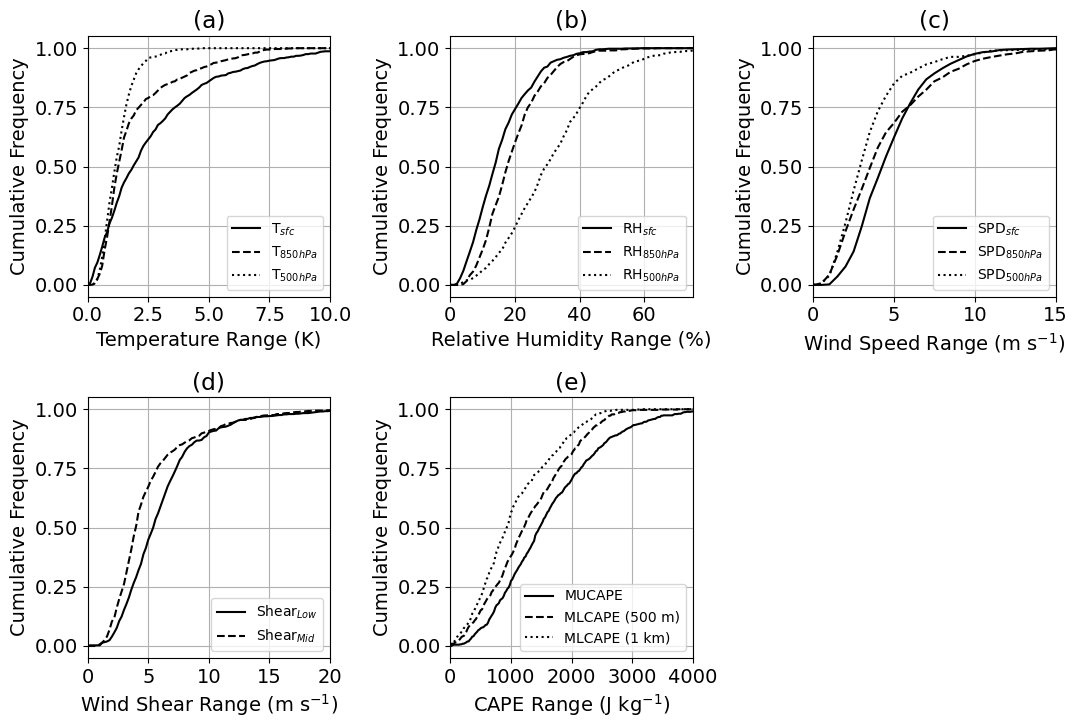

In [73]:
# Plot Cumulative Distributions for the Different Convective Environment Parameters
# Range Results
from matplotlib.gridspec import GridSpec
plt.rcParams.update({'font.size': 14})

# Define Figure subplots
fig = plt.figure(figsize=[11,7.5])
gs = GridSpec(2,3,figure=fig)
ax = OrderedDict()
ax[0] = fig.add_subplot(gs[0, 0])
ax[1] = fig.add_subplot(gs[0, 1])
ax[2] = fig.add_subplot(gs[0, 2])
ax[3] = fig.add_subplot(gs[1, 0])
ax[4] = fig.add_subplot(gs[1, 1])


cccc = 0 #All simulations/cases
cc_arr = [3] # cloud condenstate thresholds
lss = ['-','--',':']
lc = ['k','c']
st = 2 # Statistics to focus on 2 = Range
stname = 'Range '
div = 1

#st = 1 # Statistic to focus on 1 = Standard Deviation
#stname = 'Stand. Dev. '
#div = 3

fs= 10


# Temperature Results
vararr = [12,13,14]
vlbl = ['T$_{sfc}$','T$_{850hPa}$','T$_{500hPa}$']
vname = 'Temperature'
sname = stname+'(K)'
cntc = 0
for cc in cc_arr:
    cntv = 0
    for v in vararr:
        if cntc == 0:
            ax[0].plot(bins_all[cccc,cc,v,st],cdata_all[cccc,cc,v,st],c = lc[cntc],ls=lss[cntv],label=vlbl[cntv])
        else:
            ax[0].plot(bins_all[cccc,cc,v,st],cdata_all[cccc,cc,v,st],c = lc[cntc],ls=lss[cntv],label='_nolegend_')
        cntv = cntv + 1
    cntc = cntc+1
ax[0].set_xlim(np.array([0,10])/div)
ax[0].set_yticks([0,0.25,0.5,0.75,1.0])
ax[0].set_xlabel(vname+' '+sname)
ax[0].set_ylabel('Cumulative Frequency')
ax[0].set_title('(a)')
ax[0].legend(fontsize=fs)
ax[0].grid()
      
# RH Results
vararr = [8,9,10]
vlbl = ['RH$_{sfc}$','RH$_{850hPa}$','RH$_{500hPa}$']
vname = 'Relative Humidity'
sname = stname+'(%)'
cntc = 0
for cc in cc_arr:
    cntv = 0
    for v in vararr:
        if cntc == 0:
            ax[1].plot(bins_all[cccc,cc,v,st]*100,cdata_all[cccc,cc,v,st],c = lc[cntc],ls=lss[cntv],label=vlbl[cntv])
        else:
            ax[1].plot(bins_all[cccc,cc,v,st]*100,cdata_all[cccc,cc,v,st],c = lc[cntc],ls=lss[cntv],label='_nolegend_')
        cntv = cntv + 1
    cntc = cntc+1

ax[1].set_xlim(np.array([0,75])/div)
ax[1].set_yticks([0,0.25,0.5,0.75,1.0])
ax[1].set_xlabel(vname+' '+sname)
ax[1].set_ylabel('Cumulative Frequency')
ax[1].set_title('(b)')
ax[1].legend(fontsize=fs)
ax[1].grid()

# Wind Speed Results
vararr = [16,17,18]
tlbl = ['(i)','(j)','(k)','(l)']
vname = 'Wind Speed'
sname = stname+'(m s$^{-1}$)'
vlbl = ['SPD$_{sfc}$','SPD$_{850hPa}$','SPD$_{500hPa}$']
cntc = 0
for cc in cc_arr:
    cntv = 0
    for v in vararr:
        if cntc == 0:
            ax[2].plot(bins_all[cccc,cc,v,st],cdata_all[cccc,cc,v,st],c = lc[cntc],ls=lss[cntv],label=vlbl[cntv])
        else:
            ax[2].plot(bins_all[cccc,cc,v,st],cdata_all[cccc,cc,v,st],c = lc[cntc],ls=lss[cntv],label='_nolegend_')
        cntv = cntv + 1
    cntc = cntc+1

ax[2].set_xlim(np.array([0,15])/div)
ax[2].set_xlabel(vname+' '+sname)
ax[2].set_ylabel('Cumulative Frequency')
ax[2].set_yticks([0,0.25,0.5,0.75,1.0])
ax[2].set_title('(c)')
ax[2].legend(fontsize=fs)
ax[2].grid()


# Wind Shear Results
vararr = [2,3]
vlbl = ['Shear$_{Low}$','Shear$_{Mid}$']
tlbl = ['(m)','(n)','(o)','(p)']
vname = 'Wind Shear'
sname = stname+'(m s$^{-1}$)'
cntc = 0
for cc in cc_arr:
    cntv = 0
    for v in vararr:
        if cntc == 0:
            ax[3].plot(bins_all[cccc,cc,v,st],cdata_all[cccc,cc,v,st],c = lc[cntc],ls=lss[cntv],label=vlbl[cntv])
        else:
            ax[3].plot(bins_all[cccc,cc,v,st],cdata_all[cccc,cc,v,st],c = lc[cntc],ls=lss[cntv],label='_nolegend_')
        cntv = cntv + 1
    cntc = cntc+1

ax[3].set_xlabel(vname+' '+sname)
ax[3].set_ylabel('Cumulative Frequency')
ax[3].set_yticks([0,0.25,0.5,0.75,1.0])
ax[3].set_title('(d)')
ax[3].legend(fontsize=fs)
ax[3].grid()
ax[3].set_xlim(np.array([0,20])/div)

vararr = [27,25,26]
vlbl = ['MUCAPE','MLCAPE (500 m)','MLCAPE (1 km)']
vname = 'CAPE'
sname = stname+'(J kg$^{-1}$)'
cntc = 0
for cc in cc_arr:
    cntv = 0
    for v in vararr:
        if cntc == 0:
            ax[4].plot(bins_all[cccc,cc,v,st],cdata_all[cccc,cc,v,st],c = lc[cntc],ls=lss[cntv],label=vlbl[cntv])
        else:
            ax[4].plot(bins_all[cccc,cc,v,st],cdata_all[cccc,cc,v,st],c = lc[cntc],ls=lss[cntv],label='_nolegend_')
        cntv = cntv + 1
    cntc = cntc+1

ax[4].set_xlabel(vname+' '+sname)
ax[4].set_ylabel('Cumulative Frequency')
ax[4].set_yticks([0,0.25,0.5,0.75,1.0])
ax[4].set_title('(e)')
ax[4].legend(fontsize=fs)
ax[4].grid()
ax[4].set_xlim(np.array([0,4000])/div)

plt.tight_layout()
plt.savefig(savepath+'Figure03'+saveaddf+'.pdf')        
plt.savefig(savepath+'Figure03'+saveaddf+'.png')        


In [74]:
v = 10
cccc = 0
cc == 3 
st = 2
print(bins_all[cccc,cc,v,st]*100)
print(cdata_all[cccc,cc,v,st])
idnow = np.where(np.abs(cdata_all[cccc,cc,v,st] - 0.5) == np.min(np.abs(np.abs(cdata_all[cccc,cc,v,st] - 0.5))))
print(idnow)
print(bins_all[cccc,cc,v,st][idnow]*100)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.]
[0.         0.         0.00244499 0.00488998 0.01222494 0.0195599
 0.0207824  0.02933985 0.0391198  0.05012225 0.06234719 0.07212714
 0.08801956 0.10146699 0.11735941 0.13569682 0.14914425 0.17848411
 0.19804401 0.21882641 0.24449878 0.27383863 0.299511   0.32518337
 0.34718826 0.36919315 0.39242054 0.42542787 0.46454768 0.49144254
 0.50977995 0.53178484 0.55745721 0.57701711 0.59657702 0.62713936
 0.65281174 0.68826406 0.70415

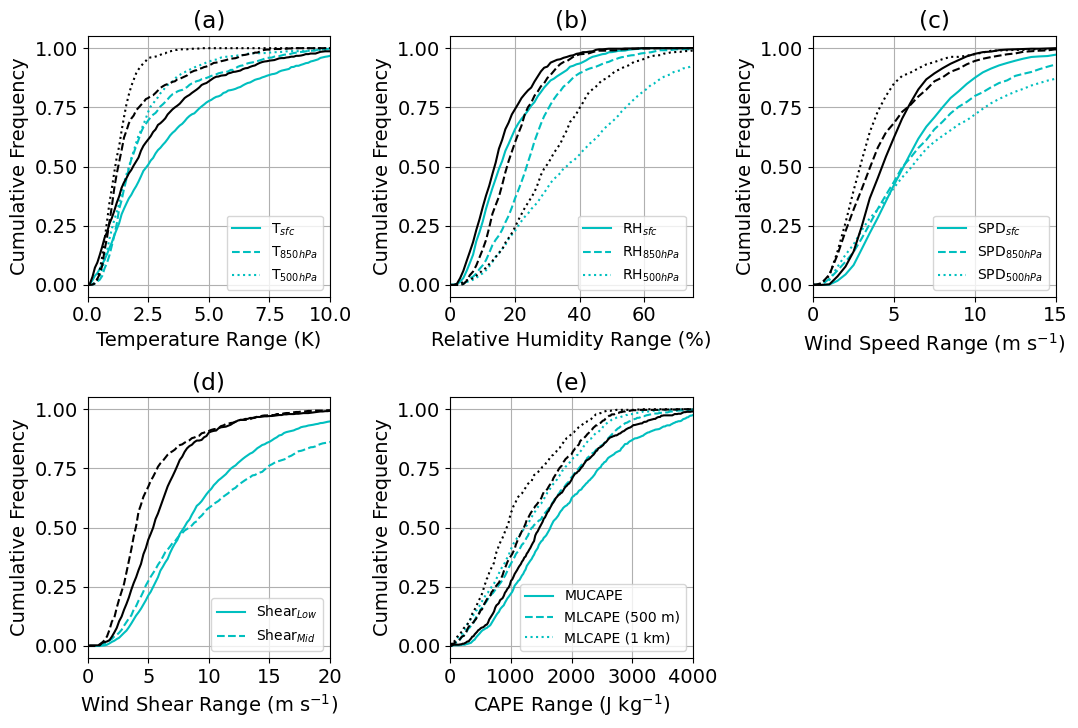

In [75]:
# Range Results
from matplotlib.gridspec import GridSpec
plt.rcParams.update({'font.size': 14})

fig = plt.figure(figsize=[11,7.5])
gs = GridSpec(2,3,figure=fig)

ax = OrderedDict()
ax[0] = fig.add_subplot(gs[0, 0])
ax[1] = fig.add_subplot(gs[0, 1])
ax[2] = fig.add_subplot(gs[0, 2])
ax[3] = fig.add_subplot(gs[1, 0])
ax[4] = fig.add_subplot(gs[1, 1])

cccc = 0
cc_arr = [6,3] # cloud condenstate thresholds
lss = ['-','--',':']
lc = ['c','k']
st = 2
stname = 'Range '
div = 1 # Scaling for plotting

#st = 1
#stname = 'Stand. Dev. '
#div = 3

fs= 10 # Fontsize


# Temperature Results
vararr = [12,13,14]
vlbl = ['T$_{sfc}$','T$_{850hPa}$','T$_{500hPa}$']
vname = 'Temperature'
sname = stname+'(K)'
cntc = 0
for cc in cc_arr:
    cntv = 0
    for v in vararr:
        if cntc == 0:
            ax[0].plot(bins_all[cccc,cc,v,st],cdata_all[cccc,cc,v,st],c = lc[cntc],ls=lss[cntv],label=vlbl[cntv])
        else:
            ax[0].plot(bins_all[cccc,cc,v,st],cdata_all[cccc,cc,v,st],c = lc[cntc],ls=lss[cntv],label='_nolegend_')
        cntv = cntv + 1
    cntc = cntc+1
ax[0].set_xlim(np.array([0,10])/div)
ax[0].set_yticks([0,0.25,0.5,0.75,1.0])
ax[0].set_xlabel(vname+' '+sname)
ax[0].set_ylabel('Cumulative Frequency')
ax[0].set_title('(a)')
ax[0].legend(fontsize=fs)
ax[0].grid()
      
# RH Results
vararr = [8,9,10]
vlbl = ['RH$_{sfc}$','RH$_{850hPa}$','RH$_{500hPa}$']
vname = 'Relative Humidity'
sname = stname+'(%)'
cntc = 0
for cc in cc_arr:
    cntv = 0
    for v in vararr:
        if cntc == 0:
            ax[1].plot(bins_all[cccc,cc,v,st]*100,cdata_all[cccc,cc,v,st],c = lc[cntc],ls=lss[cntv],label=vlbl[cntv])
        else:
            ax[1].plot(bins_all[cccc,cc,v,st]*100,cdata_all[cccc,cc,v,st],c = lc[cntc],ls=lss[cntv],label='_nolegend_')
        cntv = cntv + 1
    cntc = cntc+1

ax[1].set_xlim(np.array([0,75])/div)
ax[1].set_yticks([0,0.25,0.5,0.75,1.0])
ax[1].set_xlabel(vname+' '+sname)
ax[1].set_ylabel('Cumulative Frequency')
ax[1].set_title('(b)')
ax[1].legend(fontsize=fs)
ax[1].grid()

# Wind Speed Results
vararr = [16,17,18]
tlbl = ['(i)','(j)','(k)','(l)']
vname = 'Wind Speed'
sname = stname+'(m s$^{-1}$)'
vlbl = ['SPD$_{sfc}$','SPD$_{850hPa}$','SPD$_{500hPa}$']
cntc = 0
for cc in cc_arr:
    cntv = 0
    for v in vararr:
        if cntc == 0:
            ax[2].plot(bins_all[cccc,cc,v,st],cdata_all[cccc,cc,v,st],c = lc[cntc],ls=lss[cntv],label=vlbl[cntv])
        else:
            ax[2].plot(bins_all[cccc,cc,v,st],cdata_all[cccc,cc,v,st],c = lc[cntc],ls=lss[cntv],label='_nolegend_')
        cntv = cntv + 1
    cntc = cntc+1

ax[2].set_xlim(np.array([0,15])/div)
ax[2].set_xlabel(vname+' '+sname)
ax[2].set_ylabel('Cumulative Frequency')
ax[2].set_yticks([0,0.25,0.5,0.75,1.0])
ax[2].set_title('(c)')
ax[2].legend(fontsize=fs)
ax[2].grid()


# Wind Shear Results
vararr = [2,3]
vlbl = ['Shear$_{Low}$','Shear$_{Mid}$']
tlbl = ['(m)','(n)','(o)','(p)']
vname = 'Wind Shear'
sname = stname+'(m s$^{-1}$)'
cntc = 0
for cc in cc_arr:
    cntv = 0
    for v in vararr:
        if cntc == 0:
            ax[3].plot(bins_all[cccc,cc,v,st],cdata_all[cccc,cc,v,st],c = lc[cntc],ls=lss[cntv],label=vlbl[cntv])
        else:
            ax[3].plot(bins_all[cccc,cc,v,st],cdata_all[cccc,cc,v,st],c = lc[cntc],ls=lss[cntv],label='_nolegend_')
        cntv = cntv + 1
    cntc = cntc+1

ax[3].set_xlabel(vname+' '+sname)
ax[3].set_ylabel('Cumulative Frequency')
ax[3].set_yticks([0,0.25,0.5,0.75,1.0])
ax[3].set_title('(d)')
ax[3].legend(fontsize=fs)
ax[3].grid()
ax[3].set_xlim(np.array([0,20])/div)

vararr = [27,25,26]
vlbl = ['MUCAPE','MLCAPE (500 m)','MLCAPE (1 km)']
vname = 'CAPE'
sname = stname+'(J kg$^{-1}$)'
cntc = 0
for cc in cc_arr:
    cntv = 0
    for v in vararr:
        if cntc == 0:
            ax[4].plot(bins_all[cccc,cc,v,st],cdata_all[cccc,cc,v,st],c = lc[cntc],ls=lss[cntv],label=vlbl[cntv])
        else:
            ax[4].plot(bins_all[cccc,cc,v,st],cdata_all[cccc,cc,v,st],c = lc[cntc],ls=lss[cntv],label='_nolegend_')
        cntv = cntv + 1
    cntc = cntc+1

ax[4].set_xlabel(vname+' '+sname)
ax[4].set_ylabel('Cumulative Frequency')
ax[4].set_yticks([0,0.25,0.5,0.75,1.0])
ax[4].set_title('(e)')
ax[4].legend(fontsize=fs)
ax[4].grid()
ax[4].set_xlim(np.array([0,4000])/div)

plt.tight_layout()
plt.savefig(savepath+'FigureS02'+saveaddf+'.pdf')        
plt.savefig(savepath+'FigureS02'+saveaddf+'.png')

In [76]:
# Calculate median percentage differences between data with and without condensate thresholding
vrange = [2,3,16,17,18,19,8,9,10,11,12,13,14,15,25,26,27]

cccc = 0
cc_arr = [6,3]
st = 2 # STD or RANGE (1 or 2)

pct_des = 0.75

cntv = 0
med_pct_diff = np.zeros(len(vrange))
for v in vrange:
    cc = cc_arr[0]
    id_med = np.where(np.abs(cdata_all[cccc,cc,v,st]-pct_des) == np.min(np.abs(cdata_all[cccc,cc,v,st]-pct_des)))[0][0]
    med_wcld = bins_all[cccc,cc,v,st][id_med]

    cc = cc_arr[1]
    id_med = np.where(np.abs(cdata_all[cccc,cc,v,st]-pct_des) == np.min(np.abs(cdata_all[cccc,cc,v,st]-pct_des)))[0][0]
    med_ncld = bins_all[cccc,cc,v,st][id_med]
    
    med_pct_diff[cntv] = (med_ncld-med_wcld)/med_wcld*100
    print(var[v]['varins'],np.round(med_pct_diff[cntv],1),np.round(med_ncld,2),np.round(med_wcld,2))
    cntv = cntv+1

shr_lls -37.3 7.4 11.8
shr_mls -60.8 5.8 14.8
spd_sfcs -25.0 6.0 8.0
spd_850s -33.3 6.0 9.0
spd_500s -61.9 4.0 10.5
spd_250s -63.2 3.5 9.5
rh_sfcs -20.0 0.2 0.25
rh_850s -20.0 0.24 0.3
rh_500s -25.9 0.4 0.54
rh_250s -35.0 0.26 0.4
t_sfcs -23.4 3.6 4.7
t_850s -30.0 2.1 3.0
t_500s -38.5 1.6 2.6
t_250s -16.7 1.5 1.8
mlcapesGB -15.1 1800 2120
mlcapesGB1 -20.2 1500 1880
mucapesGB -13.0 2140 2460


In [77]:
np.nanmean(med_pct_diff)

-31.721679906684564

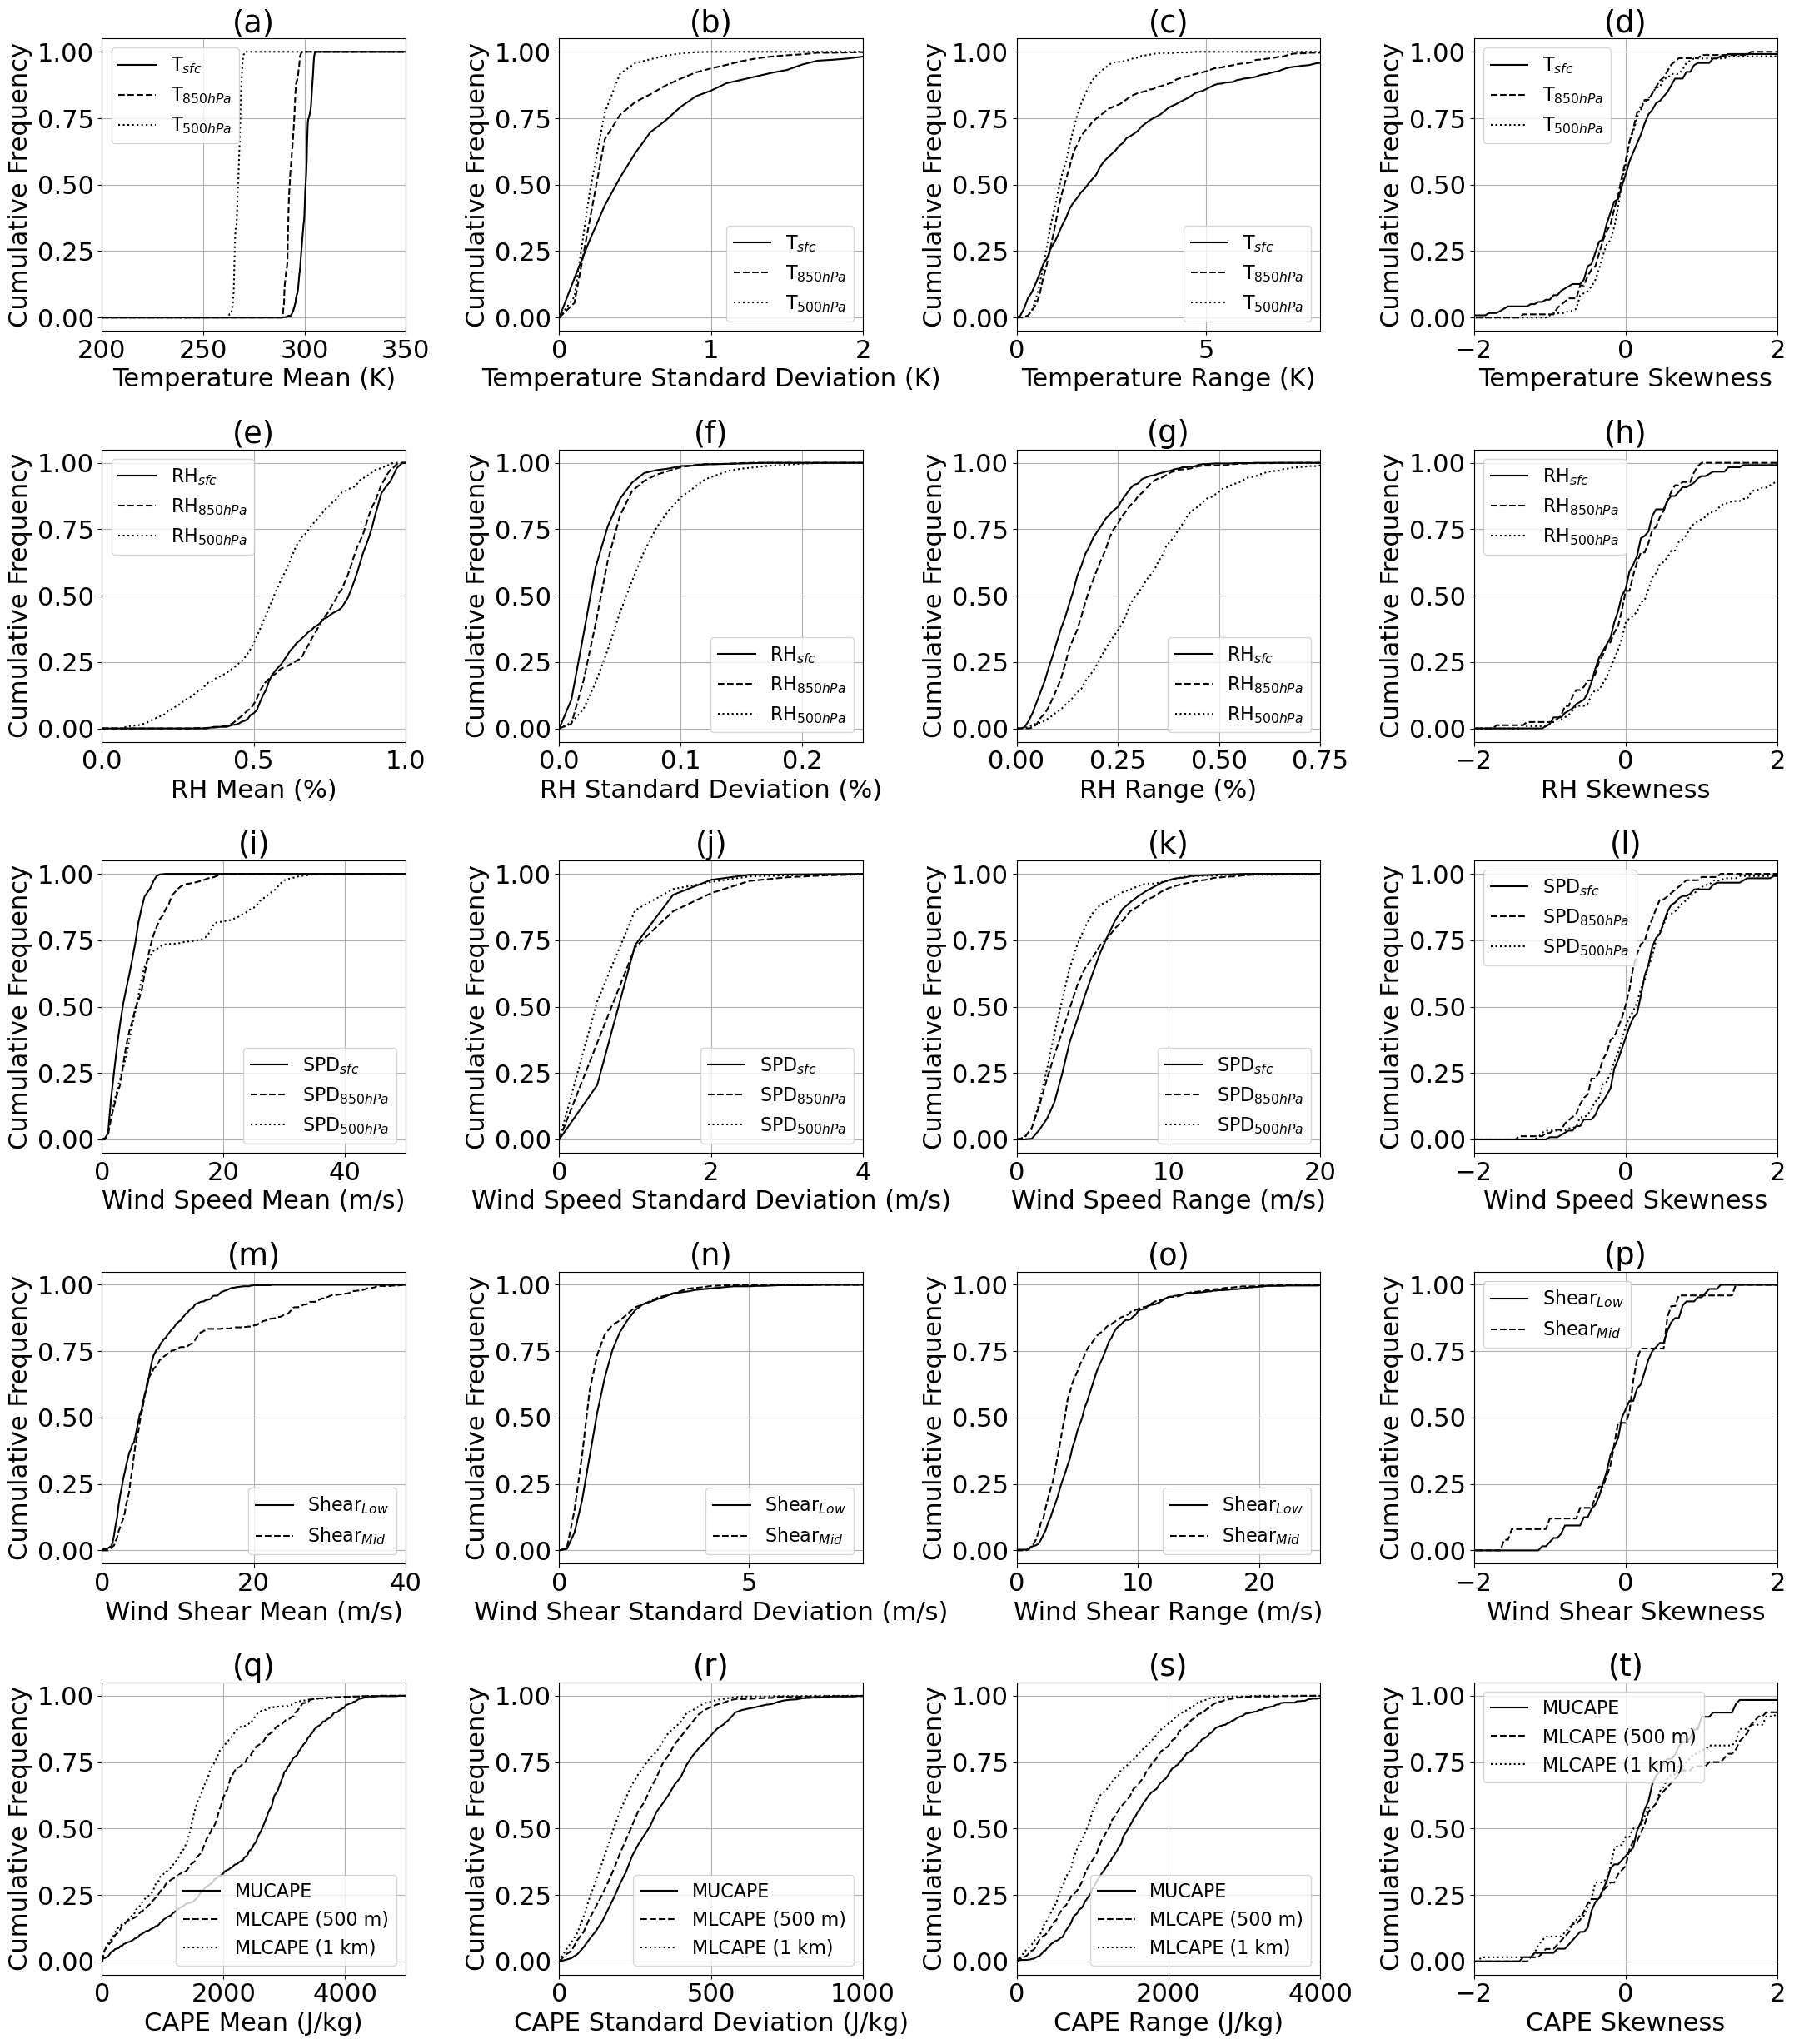

In [78]:
# Plot summary of all convective environment variable cumulative distributions and all statistics (mean, standard deviation, range, and skewness)
plt.rcParams.update({'font.size': 22})
fig,ax = plt.subplots(5,4,figsize=[22,25])
cccc = 0 # Case grouping (all)
cc = 3 # Condensate threshold
lfs = 16 # fontsize
lss = ['-','--',':']
lc = 'k'

# Temperature Results
vararr = [12,13,14]
vlbl = ['T$_{sfc}$','T$_{850hPa}$','T$_{500hPa}$']
tlbl = ['(a)','(b)','(c)','(d)']
vname = 'Temperature'
sname = ['Mean (K)','Standard Deviation (K)','Range (K)','Skewness']
for st in np.arange(0,4):
    cntv = 0
    for v in vararr:
        ax[0,st].plot(bins_all[cccc,cc,v,st],cdata_all[cccc,cc,v,st],c = lc,ls=lss[cntv],label=vlbl[cntv])
        cntv = cntv + 1

    ax[0,st].set_xlabel(vname+' '+sname[st])
    ax[0,st].set_ylabel('Cumulative Frequency')
    ax[0,st].set_yticks([0,0.25,0.5,0.75,1.0])
    ax[0,st].set_title(tlbl[st])
    ax[0,st].legend(fontsize=lfs)
    ax[0,st].grid()
ax[0,0].set_xlim([200,350])
ax[0,1].set_xlim([0,2])
ax[0,2].set_xlim([0,8])
ax[0,3].set_xlim([-2,2])
        
# RH Results
vararr = [8,9,10]
vlbl = ['RH$_{sfc}$','RH$_{850hPa}$','RH$_{500hPa}$']
tlbl = ['(e)','(f)','(g)','(h)']
vname = 'RH'
sname = ['Mean (%)','Standard Deviation (%)','Range (%)','Skewness']
for st in np.arange(0,4):
    cntv = 0
    for v in vararr:
        ax[1,st].plot(bins_all[cccc,cc,v,st],cdata_all[cccc,cc,v,st],c = lc,ls=lss[cntv],label=vlbl[cntv])
        cntv = cntv + 1

    ax[1,st].set_xlabel(vname+' '+sname[st])
    ax[1,st].set_ylabel('Cumulative Frequency')
    ax[1,st].set_yticks([0,0.25,0.5,0.75,1.0])
    ax[1,st].set_title(tlbl[st])
    ax[1,st].legend(fontsize=lfs)
    ax[1,st].grid()

ax[1,0].set_xlim([0,1.0])
ax[1,1].set_xlim([0,0.25])
ax[1,2].set_xlim([0,0.75])
ax[1,3].set_xlim([-2,2])

# Wind Speed Results
vararr = [16,17,18]
tlbl = ['(i)','(j)','(k)','(l)']
vname = 'Wind Speed'
sname = ['Mean (m/s)','Standard Deviation (m/s)','Range (m/s)','Skewness']
vlbl = ['SPD$_{sfc}$','SPD$_{850hPa}$','SPD$_{500hPa}$']
for st in np.arange(0,4):
    cntv = 0
    for v in vararr:
        ax[2,st].plot(bins_all[cccc,cc,v,st],cdata_all[cccc,cc,v,st],c = lc,ls=lss[cntv],label=vlbl[cntv])
        cntv = cntv + 1

    ax[2,st].set_xlabel(vname+' '+sname[st])
    ax[2,st].set_ylabel('Cumulative Frequency')
    ax[2,st].set_yticks([0,0.25,0.5,0.75,1.0])
    ax[2,st].set_title(tlbl[st])
    ax[2,st].legend(fontsize=lfs)
    ax[2,st].grid()

ax[2,0].set_xlim([0,50])
ax[2,1].set_xlim([0,4])
ax[2,2].set_xlim([0,20])
ax[2,3].set_xlim([-2,2])

# Wind Shear Results
vararr = [2,3]
vlbl = ['Shear$_{Low}$','Shear$_{Mid}$']
tlbl = ['(m)','(n)','(o)','(p)']
vname = 'Wind Shear'
sname = ['Mean (m/s)','Standard Deviation (m/s)','Range (m/s)','Skewness']

for st in np.arange(0,4):
    cntv = 0
    for v in vararr:
        ax[3,st].plot(bins_all[cccc,cc,v,st],cdata_all[cccc,cc,v,st],c = lc,ls=lss[cntv],label=vlbl[cntv])
        cntv = cntv + 1

    ax[3,st].set_xlabel(vname+' '+sname[st])
    ax[3,st].set_ylabel('Cumulative Frequency')
    ax[3,st].set_yticks([0,0.25,0.5,0.75,1.0])
    ax[3,st].set_title(tlbl[st])
    ax[3,st].legend(fontsize=lfs)
    ax[3,st].grid()

ax[3,0].set_xlim([0,40])
ax[3,1].set_xlim([0,8])
ax[3,2].set_xlim([0,25])
ax[3,3].set_xlim([-2,2])

vararr = [27,25,26]
vlbl = ['MUCAPE','MLCAPE (500 m)','MLCAPE (1 km)']
tlbl = ['(q)','(r)','(s)','(t)']
vname = 'CAPE'
sname = ['Mean (J/kg)','Standard Deviation (J/kg)','Range (J/kg)','Skewness']

for st in np.arange(0,4):
    cntv = 0
    for v in vararr:
        ax[4,st].plot(bins_all[cccc,cc,v,st],cdata_all[cccc,cc,v,st],c = lc,ls=lss[cntv],label=vlbl[cntv])
        cntv = cntv + 1

    ax[4,st].set_xlabel(vname+' '+sname[st])
    ax[4,st].set_ylabel('Cumulative Frequency')
    ax[4,st].set_yticks([0,0.25,0.5,0.75,1.0])
    ax[4,st].legend(fontsize=lfs)
    ax[4,st].set_title(tlbl[st])
    ax[4,st].grid()

ax[4,0].set_xlim([0,5000])
ax[4,1].set_xlim([0,1000])
ax[4,2].set_xlim([0,4000])
ax[4,3].set_xlim([-2,2])

plt.tight_layout()
plt.savefig(savepath+'FigureS01'+saveaddf+'.pdf')        
plt.savefig(savepath+'FigureS01'+saveaddf+'.png')        
